## Постановка задачи:
Датасет - удовлетворение пассажиров авиарейсов

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Классификацию будем проводить по уровню удовлетворения: "удовлетворен" или "нейтрален или неудовлетворен".

Установливаем библиотеку Pandas:

In [ ]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем необходимые модули:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [ ]:
data = pd.read_csv('/content/Airplane.csv', sep = ',', header=0, engine = 'python')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Выводим первые 10 строк dataset-а:

In [ ]:
data.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


Выводим последние 10 строк dataset-а:

In [ ]:
data.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


### О наборе данных:

Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [ ]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'Class'], end="\n\n")
print(data["Class"][2], end="\n\n")
print(data["Class"].dtype, end="\n\n")
print(type(data["Class"]), end="\n\n")
print(type(data["Class"][2]), end="\n\n")

(103904, 25)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

RangeIndex(start=0, stop=103904, step=1)

Business

Business

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [ ]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
data.describe(include = ['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [ ]:
data.describe(include = 'all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [ ]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [ ]:
data.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949


Визуализируем данные:

In [ ]:
data["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Посмотрим на распределение классов

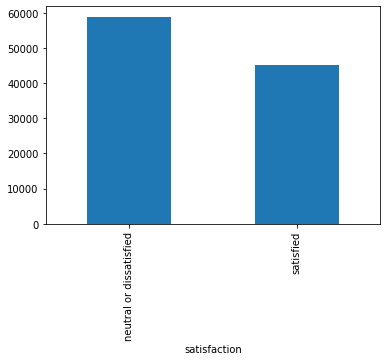

In [ ]:
data.groupby(['satisfaction']).size().plot(kind='bar') 

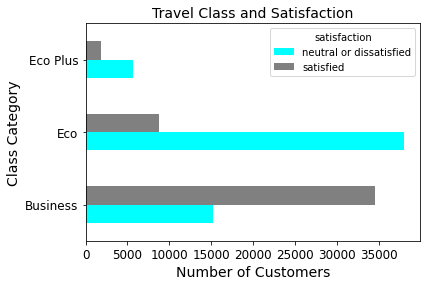

In [ ]:
by_cat_class = data.groupby(['Class', 'satisfaction']) 

ax = by_cat_class.size().unstack().plot(kind='barh', color = ['aqua', 'grey']) 

#unstack and plot 
ax.set_title('Travel Class and Satisfaction', size =14) #title 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Number of Customers', fontsize = 14) #set the x_label 
ax.set_ylabel('Class Category', fontsize = 14); #set the y_label

Если присмотреться к графам, между "overall_rating" и "satisfaction" связь незначительная. Модель может работать плохо, если мы хотим использовать признаки рейтинга.

Визуализируем некоторые графики корреляции:

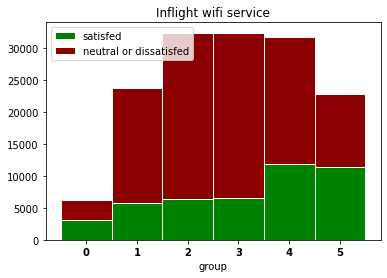

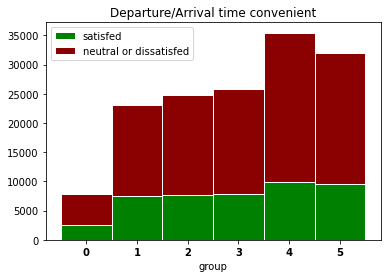

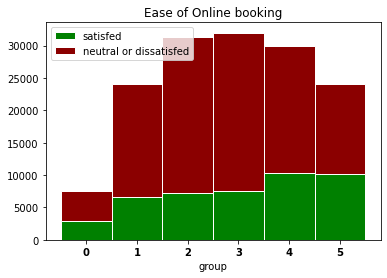

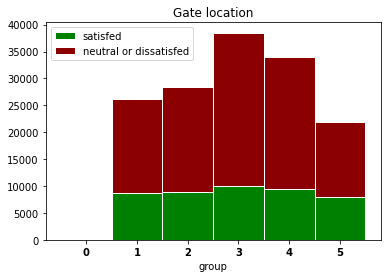

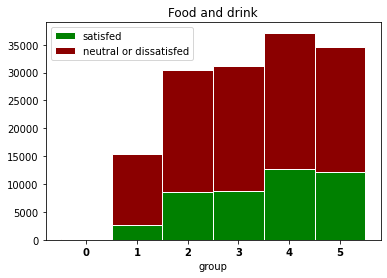

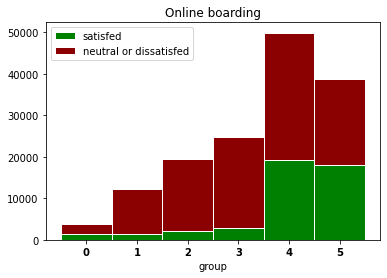

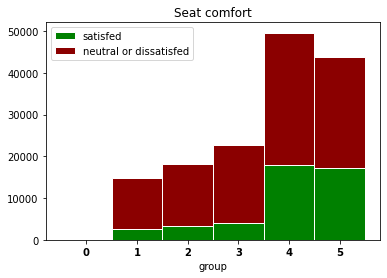

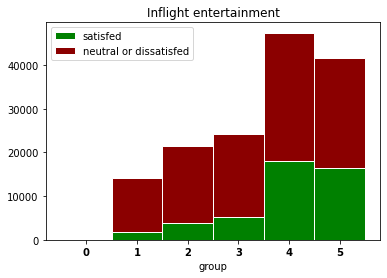

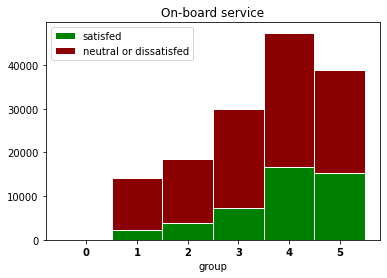

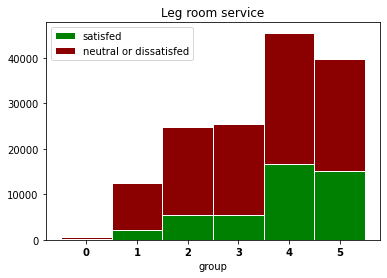

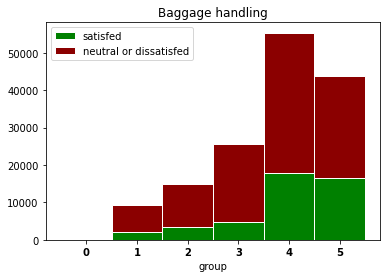

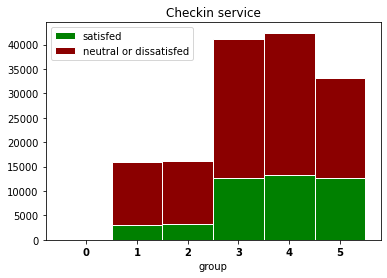

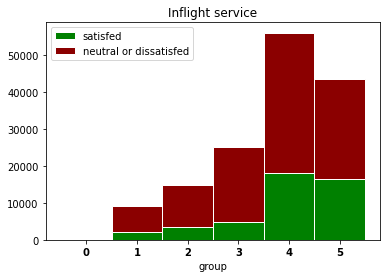

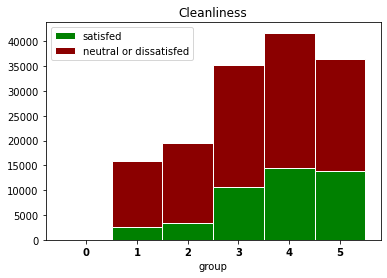

In [ ]:
COL_SAT = ["Inflight wifi service",
           "Departure/Arrival time convenient",
           "Ease of Online booking",
           "Gate location",
           "Food and drink",
           "Online boarding",
           "Seat comfort",
           "Inflight entertainment",
           "On-board service",
           "Leg room service",
           "Baggage handling",
           "Checkin service",
           "Inflight service",
           "Cleanliness"]

for COL in COL_SAT:
    # Names of group and bar width
    r = ['0','1','2','3','4', '5']
    bars1 = data.loc[data['satisfaction'] == "satisfied"].groupby([COL]).size()
    bars2 = data.groupby([COL]).size()
    barWidth = 1
     
    # Create brown bars / there is some feature without sastifed client
    try:
        plt.bar(r, bars1, color='green', edgecolor='white', width=barWidth, label = "satisfed")
    except ValueError as e:
        bars1 = pd.Series([0]).append(bars1) # analysing the data show that 0 is always missing
        plt.bar(r, bars1, color='green', edgecolor='white', width=barWidth, label = "satisfed")
    # Create green bars (middle), on top of the first ones
    try:
        plt.bar(r, bars2, bottom=bars1, color='darkred', edgecolor='white', width=barWidth, label = "neutral or dissatisfed")
    except ValueError as e:
        bars2 = pd.Series([0]).append(bars2) # analysing the data show that 0 is always missing
        plt.bar(r, bars2, bottom=bars1, color='darkred', edgecolor='white', width=barWidth, label = "neutral or dissatisfed")     
    # Custom X axis
    plt.xticks(r, r, fontweight='bold')
    plt.xlabel("group")
    plt.legend()
    plt.title(COL)
     
    # Show graphic
    plt.show()

Корреляция незначительная. Попробуем вывести матрицу корреляции.

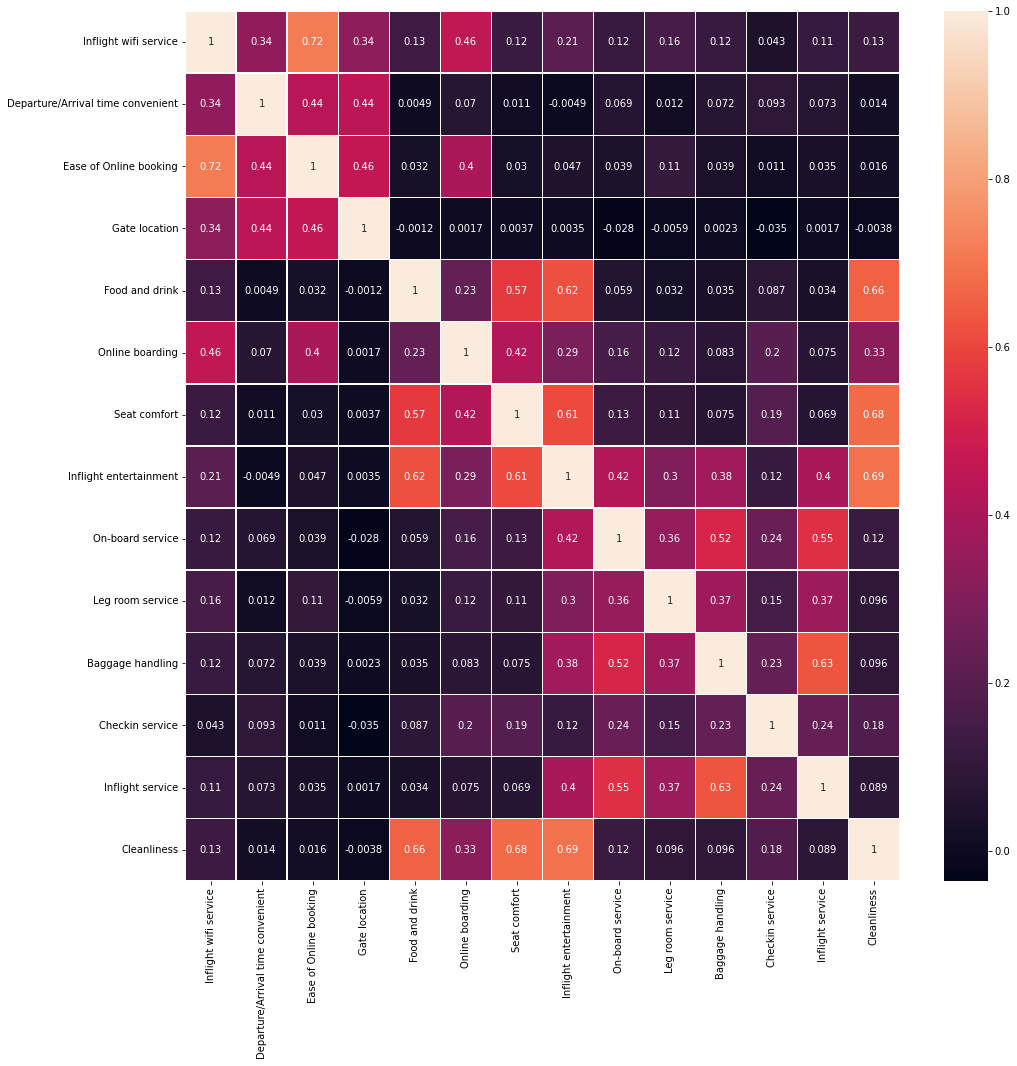

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(data[COL_SAT].corr(), annot=True, linewidths=.5, annot_kws={"size":10})
plt.show()

In [ ]:
Исходя из матрицы коррелляции, можно преподоложить, что модель будет работать плохо.

## Готовим данные

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

Рассортируем категориальные и численные признаки:

In [ ]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Выведем все уникальные значения для каждого категориального признака:

In [ ]:
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


Убедимся в корректности проделанных действий:

In [ ]:
data[numerical_columns].count(axis = 0)

id                                   103904
Age                                  103904
Flight Distance                      103904
Inflight wifi service                103904
Departure/Arrival time convenient    103904
Ease of Online booking               103904
Gate location                        103904
Food and drink                       103904
Online boarding                      103904
Seat comfort                         103904
Inflight entertainment               103904
On-board service                     103904
Leg room service                     103904
Baggage handling                     103904
Checkin service                      103904
Inflight service                     103904
Cleanliness                          103904
Departure Delay in Minutes           103904
Arrival Delay in Minutes             103594
dtype: int64

In [ ]:
data[categorical_columns].count(axis = 0)

Gender            103904
Customer Type     103904
Type of Travel    103904
Class             103904
satisfaction      103904
dtype: int64

Как видим, пропущенных значений больше не осталось

Разделим категориальные признаки на бинарные и небинарные:

In [ ]:
binary_columns    = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel', 'satisfaction'] ['Class']


Для бинарного признака заменим значения на 0 и 1:

In [ ]:
data.loc[data['satisfaction'] == 'neutral or dissatisfied', 'satisfaction'] = 0
data.loc[data['satisfaction'] == 'satisfied', 'satisfaction'] = 1

In [ ]:
data['Gender'] = pd.factorize(data['Gender'])[0]
data['Customer Type'] = pd.factorize(data['Customer Type'])[0]
data['Type of Travel'] = pd.factorize(data['Type of Travel'])[0]

Проверим результат:

In [ ]:
data['satisfaction'].describe()

count     103904
unique         2
top            0
freq       58879
Name: satisfaction, dtype: int64

К небинарным признакам применим метод векторизации:

In [ ]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary

,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
103899,0,1,0
103900,1,0,0
103901,1,0,0
103902,0,1,0


Нормализуем количественные признаки (это полезно, т.к. мы будем использовать, в том числе, метод ближайших соседей):

In [ ]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.035940e+05
mean,-5.301512e-17,-2.549034e-17,8.000991e-17,1.204252e-16,-1.155699e-16,1.262379e-16,4.280872e-17,1.706194e-16,-1.928444e-17,-3.809019e-17,-8.462587e-17,1.377265e-16,1.086972e-16,1.914767e-18,3.251685e-17,5.607532e-17,-4.321903e-17,1.853221e-17,4.684641e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732958e+00,-2.142229e+00,-1.161763e+00,-2.055748e+00,-2.006653e+00,-1.970722e+00,-2.330020e+00,-2.408462e+00,-2.408562e+00,-2.607405e+00,-2.519266e+00,-2.625336e+00,-2.547160e+00,-2.228661e+00,-2.611270e+00,-3.096489e+00,-2.504320e+00,-3.875299e-01,-3.922273e-01
25%,-8.645799e-01,-8.190365e-01,-7.776668e-01,-5.495308e-01,-6.952418e-01,-5.410570e-01,-7.646106e-01,-9.041740e-01,-9.265410e-01,-1.091206e+00,-1.018880e+00,-1.072968e+00,-1.026946e+00,-5.350423e-01,-2.404706e-01,-5.447375e-01,-9.802465e-01,-3.875299e-01,-3.922273e-01
50%,-1.807357e-03,4.103839e-02,-3.474395e-01,2.035780e-01,-3.953644e-02,1.737753e-01,1.809417e-02,-1.520300e-01,-1.855307e-01,4.249938e-01,4.815056e-01,4.794003e-01,4.932676e-01,3.117670e-01,-2.404706e-01,3.058464e-01,-2.182099e-01,-3.875299e-01,-3.922273e-01
75%,8.660101e-01,7.687940e-01,5.551353e-01,9.566867e-01,6.161689e-01,8.886076e-01,8.007989e-01,6.001139e-01,5.554796e-01,1.183094e+00,4.815056e-01,4.794003e-01,4.932676e-01,1.158576e+00,5.497960e-01,1.156430e+00,5.438268e-01,-7.364771e-02,-5.629851e-02
max,1.733828e+00,3.018221e+00,3.804405e+00,1.709795e+00,1.271874e+00,1.603440e+00,1.583504e+00,1.352258e+00,1.296490e+00,1.183094e+00,1.231698e+00,1.255584e+00,1.253374e+00,1.158576e+00,1.340063e+00,1.156430e+00,1.305863e+00,4.125418e+01,4.053940e+01


Cоеднияем все данные:

In [ ]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data.describe(include="all")

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Gender,Customer Type,Type of Travel,satisfaction
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,...,1.039040e+05,1.039040e+05,1.035940e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879.0
mean,-5.301512e-17,-2.549034e-17,8.000991e-17,1.204252e-16,-1.155699e-16,1.262379e-16,4.280872e-17,1.706194e-16,-1.928444e-17,-3.809019e-17,...,-4.321903e-17,1.853221e-17,4.684641e-17,0.477989,0.449886,0.072124,0.507459,0.182678,0.689627,NaN
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.499947,0.386404,0.462649,NaN
min,-1.732958e+00,-2.142229e+00,-1.161763e+00,-2.055748e+00,-2.006653e+00,-1.970722e+00,-2.330020e+00,-2.408462e+00,-2.408562e+00,-2.607405e+00,...,-2.504320e+00,-3.875299e-01,-3.922273e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,-8.645799e-01,-8.190365e-01,-7.776668e-01,-5.495308e-01,-6.952418e-01,-5.410570e-01,-7.646106e-01,-9.041740e-01,-9.265410e-01,-1.091206e+00,...,-9.802465e-01,-3.875299e-01,-3.922273e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,-1.807357e-03,4.103839e-02,-3.474395e-01,2.035780e-01,-3.953644e-02,1.737753e-01,1.809417e-02,-1.520300e-01,-1.855307e-01,4.249938e-01,...,-2.182099e-01,-3.875299e-01,-3.922273e-01,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
75%,8.660101e-01,7.687940e-01,5.551353e-01,9.566867e-01,6.161689e-01,8.886076e-01,8.007989e-01,6.001139e-01,5.554796e-01,1.183094e+00,...,5.438268e-01,-7.364771e-02,-5.629851e-02,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,NaN


Разбиваем наши данные на y и x:

In [ ]:
X = data.drop('satisfaction', axis = 1)
y = data['satisfaction']
feature_names = X.columns
print(feature_names)

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Gender',
       'Customer Type', 'Type of Travel'],
      dtype='object')


In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[ 0.14007623 -1.7452709  -0.73153524 ...  0.          0.
   0.        ]
 [-1.59826795 -0.95135566 -0.95717894 ...  0.          1.
   1.        ]
 [ 1.20392952 -0.88519606 -0.04758412 ...  1.          0.
   1.        ]
 ...
 [ 0.10412153 -0.62055764  0.80785621 ...  0.          1.
   1.        ]
 [-0.28697588 -1.14983447 -0.18999036 ...  1.          1.
   1.        ]
 [-0.06291966 -0.81903645  0.53507805 ...  0.          0.
   1.        ]]

[0 0 1 ... 0 0 0]

(103904, 25)

(103904,)



Разделим наш dataset на обучающую и тестовую выборку:

In [ ]:
import sys
!{sys.executable} -m pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

72732 31172 (72732,) (31172,)


In [ ]:
print(np.argwhere(np.isnan(X_train)))
for i, j in np.argwhere(np.isnan(X_train)):
    X_train[i][j] = X_train[0][j]

print(np.argwhere(np.isnan(X_test)))
for i, j in np.argwhere(np.isnan(X_test)):
    X_test[i][j] = X_test[0][j]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[  234    18]
 [ 1069    18]
 [ 2019    18]
 [ 2763    18]
 [ 2788    18]
 [ 3303    18]
 [ 4010    18]
 [ 4221    18]
 [ 4593    18]
 [ 4986    18]
 [ 6313    18]
 [ 6946    18]
 [ 7622    18]
 [ 7719    18]
 [ 8169    18]
 [ 8604    18]
 [ 8783    18]
 [ 9807    18]
 [ 9822    18]
 [10073    18]
 [11969    18]
 [12551    18]
 [12735    18]
 [12827    18]
 [12928    18]
 [13585    18]
 [14779    18]
 [15083    18]
 [15218    18]
 [15693    18]
 [16355    18]
 [16740    18]
 [16910    18]
 [16972    18]
 [17051    18]
 [17648    18]
 [17831    18]
 [17911    18]
 [18329    18]
 [18414    18]
 [18500    18]
 [18558    18]
 [18770    18]
 [19392    18]
 [19480    18]
 [19745    18]
 [20005    18]
 [20267    18]
 [20564    18]
 [20805    18]
 [20958    18]
 [21369    18]
 [21456    18]
 [22032    18]
 [22130    18]
 [22233    18]
 [22462    18]
 [22868    18]
 [23304    18]
 [23687    18]
 [23923    18]
 [24099    18]
 [24826    18]
 [25100    18]
 [25516    18]
 [25761    18]
 [26648   

Интерпретируем все значения `y` как целые числа:

In [ ]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [ ]:
print(f"{err_train}")
print(f"{err_test}")

0.06532200406973547
0.0750352880790453


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[40217  1011]
 [ 3740 27764]]

[[17103   548]
 [ 1791 11730]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [ ]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=3:

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0422372545784524
0.07442576671371744


## Другие алгоритмы обучения:

### SVC (работает очень, очень медленно):

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.04509706869053511
0.04738226613627614


### Random Forest:

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0
0.03564095983575003


### Extremely Randomized Trees:

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0
0.036475041704093415


### AdaBoost (работает очень медленно):

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.06823681460705054
0.06877967406646991


### GBT (работает очень, очень медленно):

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.03158169718968267
0.037790324650327216


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.035. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
